In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Задание 4.11.2

Задание 4.11.3

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5131209788437305

In [3]:
sil_score = []
for i in range(2, 10):
    # сначала получим предсказанные кластеры при помощи метода кластеризации
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    kmeans_pred = kmeans.labels_

    # теперь посчитаем коэффициент силуэта
    sil_score.append(silhouette_score(X=X, labels=kmeans_pred, metric='euclidean'));
max(sil_score)

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

0.5131209788437305

<BarContainer object of 8 artists>

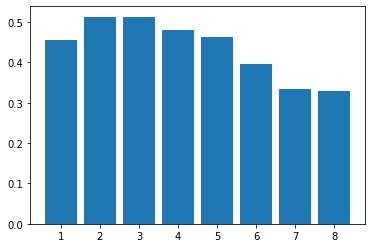

In [4]:
plt.bar(height=sil_score, x=list(range(1,9)))

Задание 4.11.1

In [5]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=3, 
                        random_state=42
                       )
em_gm.fit(X)
em_gm_pred = em_gm.predict(X)

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=em_gm_pred, metric='euclidean')

0.49893287606943293

In [6]:
sil_score = []
for i in range(2, 10):
    em_gm = GaussianMixture(n_components=i, 
                            random_state=42
                        )
    em_gm.fit(X)
    em_gm_pred = em_gm.predict(X)

    # теперь посчитаем коэффициент силуэта
    sil_score.append(silhouette_score(X=X, labels=em_gm_pred, metric='euclidean'))
sil_score

[0.45506572865005773,
 0.49893287606943293,
 0.510682306926087,
 0.481377079675046,
 0.462912077774331,
 0.44345594385628,
 0.32796642598251413,
 0.3096981122180304]

<BarContainer object of 8 artists>

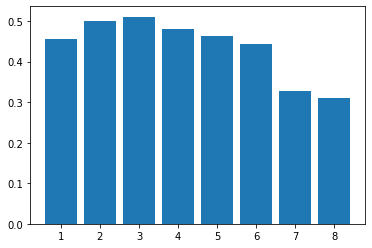

In [7]:
plt.bar(height=sil_score, x=list(range(1,9)))

In [8]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac_pred = ac.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=ac_pred, metric='euclidean')

0.4811992210663849

In [9]:
sil_score = []
for i in range(2, 10):
    ac = AgglomerativeClustering(n_clusters=i)
    ac.fit(X)
    ac_pred = ac.labels_

    # теперь посчитаем коэффициент силуэта
    sil_score.append(silhouette_score(X=X, labels=ac_pred, metric='euclidean'))
sil_score

[0.40560374862968174,
 0.4811992210663849,
 0.48470679039805054,
 0.4732978942735451,
 0.4360547281175275,
 0.3610107002721555,
 0.3470279907723165,
 0.27831000812401474]

<BarContainer object of 8 artists>

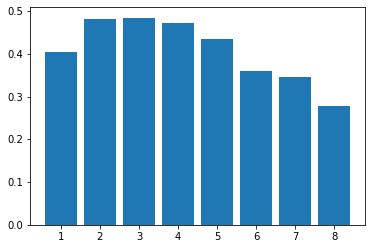

In [10]:
plt.bar(height=sil_score, x=list(range(1,9)))

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9,
                min_samples=35)

dbscan.fit(X)
dbscan_pred = dbscan.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=dbscan_pred, metric='euclidean')

0.4454335539277996

Задание 4.12.1

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler


# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X_s = StandardScaler().fit_transform(X)
kmeans.fit(X_s)
kmeans_pred = kmeans.labels_ 

# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8025180661661425

In [13]:
em_gm = GaussianMixture(n_components=3, 
                        random_state=42
                       )
em_gm.fit(X_s)
em_gm_pred = em_gm.predict(X)

# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=em_gm_pred)

0.4910646418253512

In [14]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X_s)
ac_pred = ac.labels_

# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=ac_pred)

0.9099781767383747

In [15]:
dbscan = DBSCAN(eps=0.9, min_samples=35)

dbscan.fit(X)
dbscan_pred = dbscan.labels_

# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=dbscan_pred)

0.8689356473867522

Задание 4.13.1

Задание 4.13.2

In [16]:
from sklearn.metrics.cluster import completeness_score

In [17]:
completeness_score(labels_true=y, labels_pred=em_gm_pred)

0.7672862693242196

In [18]:
completeness_score(labels_true=y, labels_pred=ac_pred)

0.9058386997451113

In [19]:
completeness_score(labels_true=y, labels_pred=dbscan_pred)

0.6965554058940557

Задание 4.14.1

Задание 4.14.2

In [20]:
from sklearn.metrics.cluster import v_measure_score

In [21]:
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.791546668267586

In [22]:
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.9079037199053294

In [23]:
v_measure_score(labels_true=y, labels_pred=em_gm_pred)

0.5988586390087208

In [24]:
v_measure_score(labels_true=y, labels_pred=dbscan_pred)

0.7732549110297919

Задание 4.14.3

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)

kmeans.fit(X_s)
kmeans_pred = kmeans.labels_
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.7892280957870129

In [26]:
kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)

kmeans.fit(X_s)
kmeans_pred = kmeans.labels_
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.7903450330611903

Задание 4.14.4

In [27]:
kmeans = KMeans(n_clusters=3, n_init=1, random_state=42)

kmeans.fit(X_s)
kmeans_pred = kmeans.labels_
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.7892280957870129

In [28]:
from sklearn.preprocessing import Normalizer

In [29]:
X_normalized = Normalizer().fit_transform(X_s)

In [30]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_mini_batch.fit(X_normalized)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
round(v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred),3)

0.795

Задание 4.14.5

In [31]:
ac = AgglomerativeClustering(n_clusters=3, linkage="ward")
ac.fit(X_s)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.9079037199053294

In [32]:
ac = AgglomerativeClustering(n_clusters=3, linkage="complete")
ac.fit(X_s)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.5805530251504777

In [33]:
ac = AgglomerativeClustering(n_clusters=3, linkage="average")
ac.fit(X_s)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.678656551579543

In [34]:
ac = AgglomerativeClustering(n_clusters=3, linkage="single")
ac.fit(X_s)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.0008842106330108959

Задание 4.14.6

In [35]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [36]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X_normalized)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.9113483318846376

In [37]:
ac = AgglomerativeClustering(n_clusters=3, connectivity = connectivity)
ac.fit(X_normalized)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.9190928271562315

Задание 4.14.7

In [38]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
dbscan_pred = dbscan.labels_
v_measure_score(labels_true=y, labels_pred=dbscan.labels_)

0.7732549110297919

In [39]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
dbscan_pred = dbscan.labels_
v_measure_score(labels_true=y, labels_pred=dbscan_pred)

0.7063100442576922

Задание 4.14.8

In [40]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
dbscan_pred = dbscan.labels_
# теперь посчитаем коэффициент силуэта
v_measure_score(labels_true=y, labels_pred=dbscan_pred)

0.7732549110297919

NameError: name 'islice' is not defined

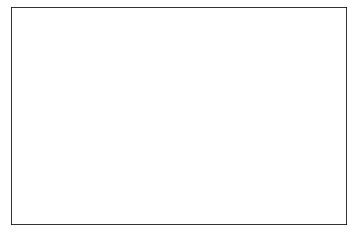

In [41]:
plt.subplot(111)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                '#f781bf', '#a65628', '#984ea3',
                                '#999999', '#e41a1c', '#dede00']),
                        int(max(dbscan_pred) + 1))))
# чёрным цветом отметим выбросы
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], color=colors[dbscan_pred])

In [ ]:
counts = np.unique(dbscan.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

[-1  0  1  2] [ 368  656  721 1255] 

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(data=np.vstack([y, dbscan.labels_]).T, columns=['true', 'pred'])

In [ ]:
data

,true,pred
0,1,0
1,1,0
2,0,1
3,0,1
4,0,-1
...,...,...
2995,2,2
2996,2,2
2997,2,2
2998,2,2


In [ ]:
data = data[data['pred']>=0]

In [ ]:
round(v_measure_score(labels_true=data['true'], labels_pred=data['pred']),2)

0.97

Задание 4.14.9

In [ ]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.703747024360433

In [ ]:
ac.fit(X_s)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.9079037199053294

In [ ]:
ac.fit(X_normalized)
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.9113483318846376

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ac.fit(MinMaxScaler().fit_transform(X))
ac_pred = ac.labels_
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.8929241488344335